In [1]:
#Classification Stock Prices  with Keras LTSM Network

from pandas import read_csv
from pandas import datetime
from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import library as mio



Using TensorFlow backend.
j:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
j:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# reduced list only the most correlated
indices_list_Complete = ["SPY","^IXIC", "^DJI", "^GDAXI", "^FTSE","^FCHI", "^N225","^HSI", "^AXJO","ORB", "EUR","AUD","GBP","JPY", "SILVER", "GOLD", "WT1010"] # reduced list only the most correlated
indice_target=["^GSPC"]

In [3]:
start_date = "2009-01-01" # Start day of Series
end_date = "2017-01-01"	  # Final day of series
dates = pd.date_range(start_date, end_date)  # date range as index

In [4]:
df_index = mio.get_data(indices_list_Complete, dates)
df_target= mio.get_data(indice_target, dates)

In [5]:
df_index.fillna(method='bfill', inplace=True)
df_target.fillna(method='bfill', inplace=True)

In [6]:
df_index.tail()

,SPY,^IXIC,^DJI,^GDAXI,^FTSE,^FCHI,^N225,^HSI,^AXJO,ORB,EUR,AUD,GBP,JPY,SILVER,GOLD,WT1010
2016-12-23,224.732324,5462.689941,19933.810547,11449.929688,7068.200195,4839.680176,19403.060547,21574.759766,5627.899902,51.74,0.957179,1.394655,0.814821,117.185667,15.74,1131.00,0.25
2016-12-27,225.289896,5487.439941,19945.039062,11472.240234,7106.100098,4848.279785,19403.060547,21754.740234,5685.000000,52.25,0.956361,1.391288,0.815262,117.457200,15.85,1139.75,0.21
2016-12-28,223.427985,5438.560059,19833.679688,11474.990234,7106.100098,4848.009766,19401.720703,21754.740234,5685.000000,53.39,0.963017,1.393879,0.817868,117.543337,15.85,1139.75,0.19
2016-12-29,223.378214,5432.089844,19819.779297,11451.049805,7120.299805,4838.470215,19145.140625,21790.910156,5699.100098,53.46,0.954902,1.387659,0.817942,116.505533,16.06,1146.80,0.17
2016-12-30,222.561759,5383.120117,19762.599609,11481.059570,7142.799805,4862.310059,19114.369141,22000.560547,5665.799805,53.30,0.948191,1.385629,0.810056,116.637500,16.24,1159.10,0.19


In [7]:
colums_1=df_index.columns

In [8]:
for index in colums_1:
    df_index[index+'_Ret'] = df_index[index].pct_change(1)
    df_index.drop(index,axis=1, inplace=True)

In [9]:
df_index.replace([np.inf, -np.inf], np.nan)
df_index[df_index==np.inf] = np.nan
df_index[df_index==-np.inf] = np.nan
df_index.fillna(method='bfill', inplace=True)

In [10]:
df_index.tail()

,SPY_Ret,^IXIC_Ret,^DJI_Ret,^GDAXI_Ret,^FTSE_Ret,^FCHI_Ret,^N225_Ret,^HSI_Ret,^AXJO_Ret,ORB_Ret,EUR_Ret,AUD_Ret,GBP_Ret,JPY_Ret,SILVER_Ret,GOLD_Ret,WT1010_Ret
2016-12-23,0.001464,0.002803,0.000750,-0.000539,0.000637,0.001045,-0.001267,-0.002840,-0.002835,0.000193,-0.000564,0.005159,0.002310,-0.003371,-0.001902,0.000398,0.000000
2016-12-27,0.002481,0.004531,0.000563,0.001949,0.005362,0.001777,0.000000,0.008342,0.010146,0.009857,-0.000855,-0.002414,0.000541,0.002317,0.006989,0.007737,-0.160000
2016-12-28,-0.008265,-0.008908,-0.005583,0.000240,0.000000,-0.000056,-0.000069,0.000000,0.000000,0.021818,0.006960,0.001862,0.003197,0.000733,0.000000,0.000000,-0.095238
2016-12-29,-0.000223,-0.001190,-0.000701,-0.002086,0.001998,-0.001968,-0.013225,0.001663,0.002480,0.001311,-0.008427,-0.004462,0.000090,-0.008829,0.013249,0.006186,-0.105263
2016-12-30,-0.003655,-0.009015,-0.002885,0.002621,0.003160,0.004927,-0.001607,0.009621,-0.005843,-0.002993,-0.007028,-0.001463,-0.009641,0.001133,0.011208,0.010725,0.117647


In [11]:
df_index.columns

Index(['SPY_Ret', '^IXIC_Ret', '^DJI_Ret', '^GDAXI_Ret', '^FTSE_Ret',
       '^FCHI_Ret', '^N225_Ret', '^HSI_Ret', '^AXJO_Ret', 'ORB_Ret', 'EUR_Ret',
       'AUD_Ret', 'GBP_Ret', 'JPY_Ret', 'SILVER_Ret', 'GOLD_Ret',
       'WT1010_Ret'],
      dtype='object')

In [12]:
def shift_minus(df, list_s, n):
    for symbol in list_s:
        M = pd.Series(df[symbol].shift(-1), name = str(symbol)+"-" + str(n))
        df=df.join(M)
    return df

In [13]:
colums_1=['SPY_Ret', '^IXIC_Ret', '^DJI_Ret']

In [14]:
df_target_2=shift_minus(df_index, colums_1,1)

In [15]:
df_target_2.tail()

,SPY_Ret,^IXIC_Ret,^DJI_Ret,^GDAXI_Ret,^FTSE_Ret,^FCHI_Ret,^N225_Ret,^HSI_Ret,^AXJO_Ret,ORB_Ret,EUR_Ret,AUD_Ret,GBP_Ret,JPY_Ret,SILVER_Ret,GOLD_Ret,WT1010_Ret,SPY_Ret-1,^IXIC_Ret-1,^DJI_Ret-1
2016-12-23,0.001464,0.002803,0.000750,-0.000539,0.000637,0.001045,-0.001267,-0.002840,-0.002835,0.000193,-0.000564,0.005159,0.002310,-0.003371,-0.001902,0.000398,0.000000,0.002481,0.004531,0.000563
2016-12-27,0.002481,0.004531,0.000563,0.001949,0.005362,0.001777,0.000000,0.008342,0.010146,0.009857,-0.000855,-0.002414,0.000541,0.002317,0.006989,0.007737,-0.160000,-0.008265,-0.008908,-0.005583
2016-12-28,-0.008265,-0.008908,-0.005583,0.000240,0.000000,-0.000056,-0.000069,0.000000,0.000000,0.021818,0.006960,0.001862,0.003197,0.000733,0.000000,0.000000,-0.095238,-0.000223,-0.001190,-0.000701
2016-12-29,-0.000223,-0.001190,-0.000701,-0.002086,0.001998,-0.001968,-0.013225,0.001663,0.002480,0.001311,-0.008427,-0.004462,0.000090,-0.008829,0.013249,0.006186,-0.105263,-0.003655,-0.009015,-0.002885
2016-12-30,-0.003655,-0.009015,-0.002885,0.002621,0.003160,0.004927,-0.001607,0.009621,-0.005843,-0.002993,-0.007028,-0.001463,-0.009641,0.001133,0.011208,0.010725,0.117647,NaN,NaN,NaN


In [16]:
def del_col(df, list_s, n):
    for symbol in list_s:
        df.drop(symbol,axis=1,inplace=True)
    return df

In [17]:
df_target_3=del_col(df_target_2,colums_1,1)

In [18]:
df_target_3.tail()

,^GDAXI_Ret,^FTSE_Ret,^FCHI_Ret,^N225_Ret,^HSI_Ret,^AXJO_Ret,ORB_Ret,EUR_Ret,AUD_Ret,GBP_Ret,JPY_Ret,SILVER_Ret,GOLD_Ret,WT1010_Ret,SPY_Ret-1,^IXIC_Ret-1,^DJI_Ret-1
2016-12-23,-0.000539,0.000637,0.001045,-0.001267,-0.002840,-0.002835,0.000193,-0.000564,0.005159,0.002310,-0.003371,-0.001902,0.000398,0.000000,0.002481,0.004531,0.000563
2016-12-27,0.001949,0.005362,0.001777,0.000000,0.008342,0.010146,0.009857,-0.000855,-0.002414,0.000541,0.002317,0.006989,0.007737,-0.160000,-0.008265,-0.008908,-0.005583
2016-12-28,0.000240,0.000000,-0.000056,-0.000069,0.000000,0.000000,0.021818,0.006960,0.001862,0.003197,0.000733,0.000000,0.000000,-0.095238,-0.000223,-0.001190,-0.000701
2016-12-29,-0.002086,0.001998,-0.001968,-0.013225,0.001663,0.002480,0.001311,-0.008427,-0.004462,0.000090,-0.008829,0.013249,0.006186,-0.105263,-0.003655,-0.009015,-0.002885
2016-12-30,0.002621,0.003160,0.004927,-0.001607,0.009621,-0.005843,-0.002993,-0.007028,-0.001463,-0.009641,0.001133,0.011208,0.010725,0.117647,NaN,NaN,NaN


In [19]:
colums_2=df_target.columns

In [20]:
for index in colums_2:
    df_target[index+'_Ret'] = df_target[index].pct_change(1)
    df_target.drop(index,axis=1, inplace=True)

In [21]:
df_target.replace([np.inf, -np.inf], np.nan)
df_target[df_target==np.inf] = np.nan
df_target[df_target==-np.inf] = np.nan
df_target.fillna(method='bfill', inplace=True)

In [22]:
df_target.describe()

,^GSPC_Ret
count,2014.000000
mean,0.000493
std,0.010965
min,-0.066634
25%,-0.004069
50%,0.000611
75%,0.005642
max,0.070758


In [23]:
df_final = df_target_3.join(df_target)


In [24]:
df_final=df_final[:-1]

In [25]:
df_final.head()

,^GDAXI_Ret,^FTSE_Ret,^FCHI_Ret,^N225_Ret,^HSI_Ret,^AXJO_Ret,ORB_Ret,EUR_Ret,AUD_Ret,GBP_Ret,JPY_Ret,SILVER_Ret,GOLD_Ret,WT1010_Ret,SPY_Ret-1,^IXIC_Ret-1,^DJI_Ret-1,^GSPC_Ret
2009-01-02,0.002196,0.003902,0.003054,0.000000,0.034601,-0.007216,0.087537,0.021902,-0.010359,-0.009980,0.018139,-0.000903,-0.011210,0.016835,-0.001183,-0.002561,-0.009054,-0.004668
2009-01-05,0.002196,0.003902,0.003054,0.000000,0.034601,-0.007216,0.087537,0.021902,-0.010359,-0.009980,0.018139,-0.000903,-0.011210,0.016835,0.006677,0.014957,0.006949,-0.004668
2009-01-06,0.008491,0.012949,0.010804,0.004171,-0.003457,0.015107,0.053206,0.009150,-0.008865,-0.009591,0.009901,-0.019874,-0.018605,0.009934,-0.029956,-0.032269,-0.027221,0.007817
2009-01-07,-0.017675,-0.028326,-0.014760,0.017443,-0.033660,0.009886,-0.019214,-0.013482,0.000796,-0.024127,-0.013729,0.051613,0.023697,0.026230,0.004081,0.011225,-0.003106,-0.030010
2009-01-08,-0.011658,-0.000466,-0.006503,-0.039269,-0.038135,-0.022594,-0.074180,-0.003900,0.015097,-0.006973,-0.017088,-0.046450,-0.024884,0.028754,-0.021419,-0.028089,-0.016389,0.003397


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

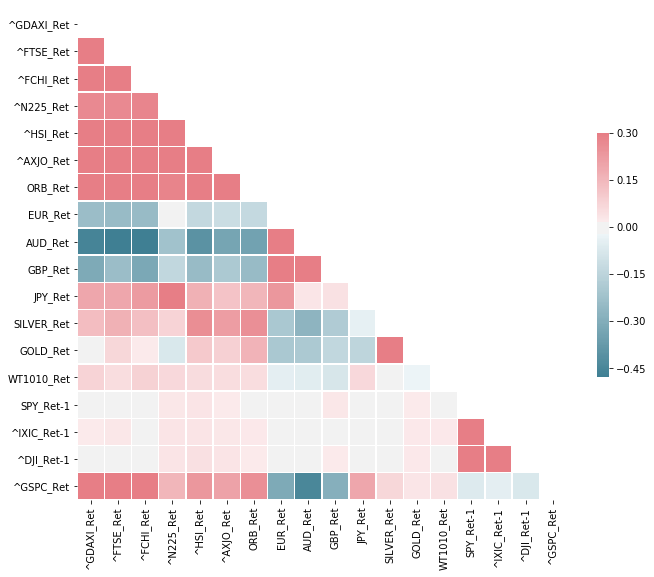

In [27]:
corr = df_final.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [28]:
def Label_Change2 (x):
    if x >= 0 :
        return 1

    return 0

In [29]:
#df_final=df_final.applymap(Label_Change2)

In [30]:
df_final.tail()

,^GDAXI_Ret,^FTSE_Ret,^FCHI_Ret,^N225_Ret,^HSI_Ret,^AXJO_Ret,ORB_Ret,EUR_Ret,AUD_Ret,GBP_Ret,JPY_Ret,SILVER_Ret,GOLD_Ret,WT1010_Ret,SPY_Ret-1,^IXIC_Ret-1,^DJI_Ret-1,^GSPC_Ret
2016-12-22,-0.001093,0.003167,0.000168,-0.000865,-0.007960,0.005415,-0.009952,-0.001324,0.005745,0.004228,-0.000074,-0.016220,-0.003394,0.041667,0.001464,0.002803,0.000750,-0.001863
2016-12-23,-0.000539,0.000637,0.001045,-0.001267,-0.002840,-0.002835,0.000193,-0.000564,0.005159,0.002310,-0.003371,-0.001902,0.000398,0.000000,0.002481,0.004531,0.000563,0.001252
2016-12-27,0.001949,0.005362,0.001777,0.000000,0.008342,0.010146,0.009857,-0.000855,-0.002414,0.000541,0.002317,0.006989,0.007737,-0.160000,-0.008265,-0.008908,-0.005583,0.002248
2016-12-28,0.000240,0.000000,-0.000056,-0.000069,0.000000,0.000000,0.021818,0.006960,0.001862,0.003197,0.000733,0.000000,0.000000,-0.095238,-0.000223,-0.001190,-0.000701,-0.008357
2016-12-29,-0.002086,0.001998,-0.001968,-0.013225,0.001663,0.002480,0.001311,-0.008427,-0.004462,0.000090,-0.008829,0.013249,0.006186,-0.105263,-0.003655,-0.009015,-0.002885,-0.000293


In [31]:
df_final['^GSPC_final']=np.where(df_final['^GSPC_Ret']>=0, 1, 0)

In [32]:
df_final.drop('^GSPC_Ret',axis=1,inplace=True)

In [33]:
df_final.columns

Index(['^GDAXI_Ret', '^FTSE_Ret', '^FCHI_Ret', '^N225_Ret', '^HSI_Ret',
       '^AXJO_Ret', 'ORB_Ret', 'EUR_Ret', 'AUD_Ret', 'GBP_Ret', 'JPY_Ret',
       'SILVER_Ret', 'GOLD_Ret', 'WT1010_Ret', 'SPY_Ret-1', '^IXIC_Ret-1',
       '^DJI_Ret-1', '^GSPC_final'],
      dtype='object')

In [34]:
df_final=df_final[['^GDAXI_Ret', '^FTSE_Ret', '^FCHI_Ret', '^N225_Ret', '^HSI_Ret',
       '^AXJO_Ret', 'ORB_Ret', 'JPY_Ret', 'WT1010_Ret','^GSPC_final']]

In [35]:
df_final.head()

,^GDAXI_Ret,^FTSE_Ret,^FCHI_Ret,^N225_Ret,^HSI_Ret,^AXJO_Ret,ORB_Ret,JPY_Ret,WT1010_Ret,^GSPC_final
2009-01-02,0.002196,0.003902,0.003054,0.000000,0.034601,-0.007216,0.087537,0.018139,0.016835,0
2009-01-05,0.002196,0.003902,0.003054,0.000000,0.034601,-0.007216,0.087537,0.018139,0.016835,0
2009-01-06,0.008491,0.012949,0.010804,0.004171,-0.003457,0.015107,0.053206,0.009901,0.009934,1
2009-01-07,-0.017675,-0.028326,-0.014760,0.017443,-0.033660,0.009886,-0.019214,-0.013729,0.026230,0
2009-01-08,-0.011658,-0.000466,-0.006503,-0.039269,-0.038135,-0.022594,-0.074180,-0.017088,0.028754,1


In [36]:

columns=df_final.columns

In [37]:
values = df_final.values
train_size = int(len(values) * 0.70)
train, test = values[0:train_size], values[train_size:len(values)]
print('Observations: %d' % (len(values)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 2013
Training Observations: 1409
Testing Observations: 604


In [38]:
df_test=df_final[train_size:len(values)]

In [39]:
indexs=df_test.index

In [40]:
indexs

DatetimeIndex(['2014-08-08', '2014-08-11', '2014-08-12', '2014-08-13',
               '2014-08-14', '2014-08-15', '2014-08-18', '2014-08-19',
               '2014-08-20', '2014-08-21',
               ...
               '2016-12-15', '2016-12-16', '2016-12-19', '2016-12-20',
               '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-27',
               '2016-12-28', '2016-12-29'],
              dtype='datetime64[ns]', length=604, freq=None)

In [41]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]



In [42]:
test_y

array([1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 1.

In [43]:
#train_XS = train_XS.reshape((train_XS.shape[0], 1, train_XS.shape[1]))
#test_XS = test_XS.reshape((test_XS.shape[0], 1, test_XS.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1409, 9) (1409,) (604, 9) (604,)


In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import Adam
import keras.backend as K
from keras.callbacks import EarlyStopping

In [45]:
# design network
# play around with learning rate and optimizer
K.clear_session()
model = Sequential()
model.add(Dense(1, input_dim=9, activation='sigmoid'))
model.compile(Adam(lr=0.1), 'binary_crossentropy', metrics=['accuracy'])

In [46]:
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)

In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [48]:
history = model.fit(train_X, train_y, verbose=2, shuffle=False, validation_data=(test_X, test_y), epochs=250, batch_size=64,callbacks=[early_stop])
#model.fit(train_XS, train_yS, epochs=250, batch_size=16, validation_data=(test_XS, test_yS), verbose=2, shuffle=False)

Train on 1409 samples, validate on 604 samples
Epoch 1/250
 - 0s - loss: 0.6791 - acc: 0.5614 - val_loss: 0.6838 - val_acc: 0.6126
Epoch 2/250
 - 0s - loss: 0.6586 - acc: 0.6537 - val_loss: 0.6940 - val_acc: 0.6060
Epoch 3/250
 - 0s - loss: 0.6398 - acc: 0.6657 - val_loss: 0.6986 - val_acc: 0.6374
Epoch 4/250
 - 0s - loss: 0.6271 - acc: 0.6820 - val_loss: 0.7029 - val_acc: 0.6374
Epoch 5/250
 - 0s - loss: 0.6160 - acc: 0.6962 - val_loss: 0.7036 - val_acc: 0.6407
Epoch 6/250
 - 0s - loss: 0.6067 - acc: 0.6955 - val_loss: 0.7019 - val_acc: 0.6440
Epoch 7/250
 - 0s - loss: 0.5986 - acc: 0.7040 - val_loss: 0.6982 - val_acc: 0.6507
Epoch 8/250
 - 0s - loss: 0.5915 - acc: 0.7083 - val_loss: 0.6928 - val_acc: 0.6556
Epoch 9/250
 - 0s - loss: 0.5851 - acc: 0.7111 - val_loss: 0.6864 - val_acc: 0.6722
Epoch 10/250
 - 0s - loss: 0.5795 - acc: 0.7154 - val_loss: 0.6791 - val_acc: 0.6672
Epoch 11/250
 - 0s - loss: 0.5744 - acc: 0.7175 - val_loss: 0.6714 - val_acc: 0.6689
Epoch 12/250
 - 0s - loss: 

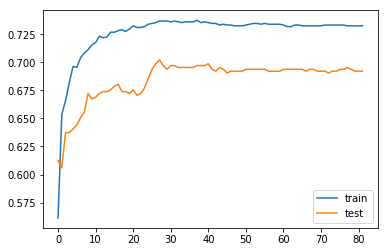

In [49]:
from matplotlib import pyplot
# plot history
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show() 

In [611]:
# make a prediction
y_test_pred = model.predict_classes(test_X)

In [612]:
from sklearn.metrics import confusion_matrix, classification_report


In [613]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [614]:
# check the confusion matrix, precision and recall

pretty_confusion_matrix(test_y, y_test_pred, labels=['UP', 'Down'])

,Predicted UP,Predicted Down
UP,176,121
Down,66,241


In [615]:
print(classification_report(test_y, y_test_pred))

             precision    recall  f1-score   support

        0.0       0.73      0.59      0.65       297
        1.0       0.67      0.79      0.72       307

avg / total       0.70      0.69      0.69       604

